# Software Design June, 2022
## Jun Hirabayashi   twitter:@hirax

## 顔動画から、肌色変化を分析する

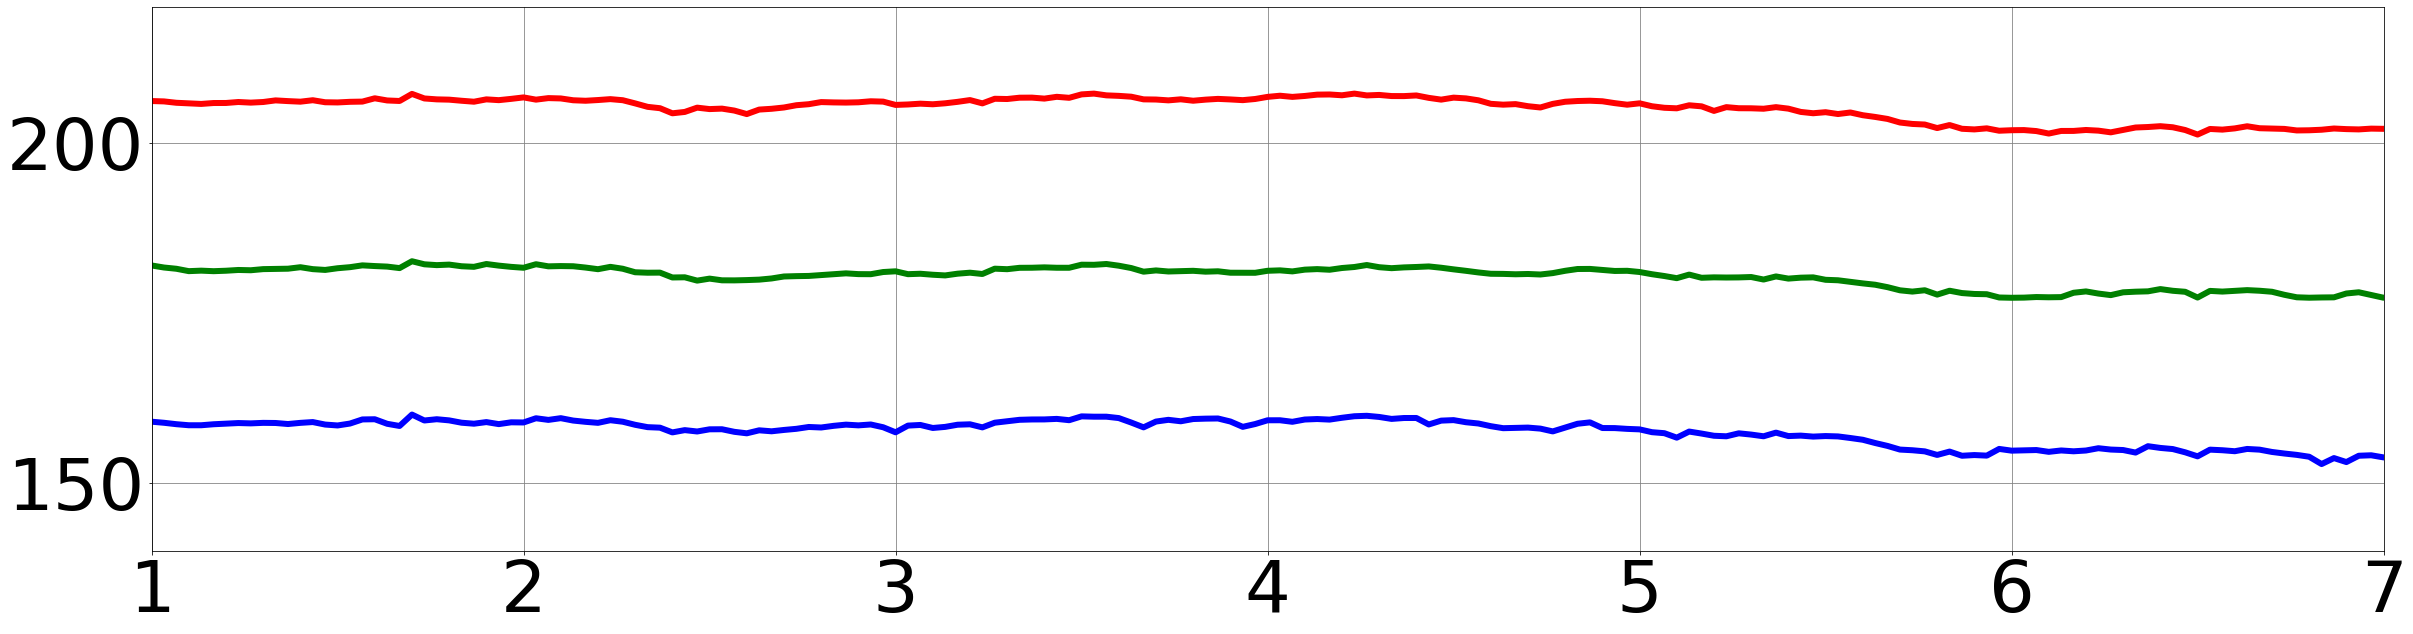

In [1]:
# face.mov
# 2686 × 1761

import cv2
import numpy as np
import matplotlib.pyplot as plt

frames=0; r =[]; g=[]; b=[]
vidcap = cv2.VideoCapture('face.mov')
success, img = vidcap.read()
while success:
    b.append(np.average(img[1300:1350,1300:1350,0]))
    g.append(np.average(img[1300:1350,1300:1350,1]))
    r.append(np.average(img[1300:1350,1300:1350,2]))
    frames += 1; success, img = vidcap.read()

plt.style.use({'figure.figsize': (40, 10)})
plt.rcParams["font.size"] = 72

frames=len(b); x=np.arange(0,1/30*frames,1/30)
plt.ylim([140,220])
plt.xlim([1,7])
plt.grid(color='gray')
plt.plot(x, b, color='blue', lw=6)
plt.plot(x, g, color='green', lw=6)
plt.plot(x, r, color='red', lw=6)

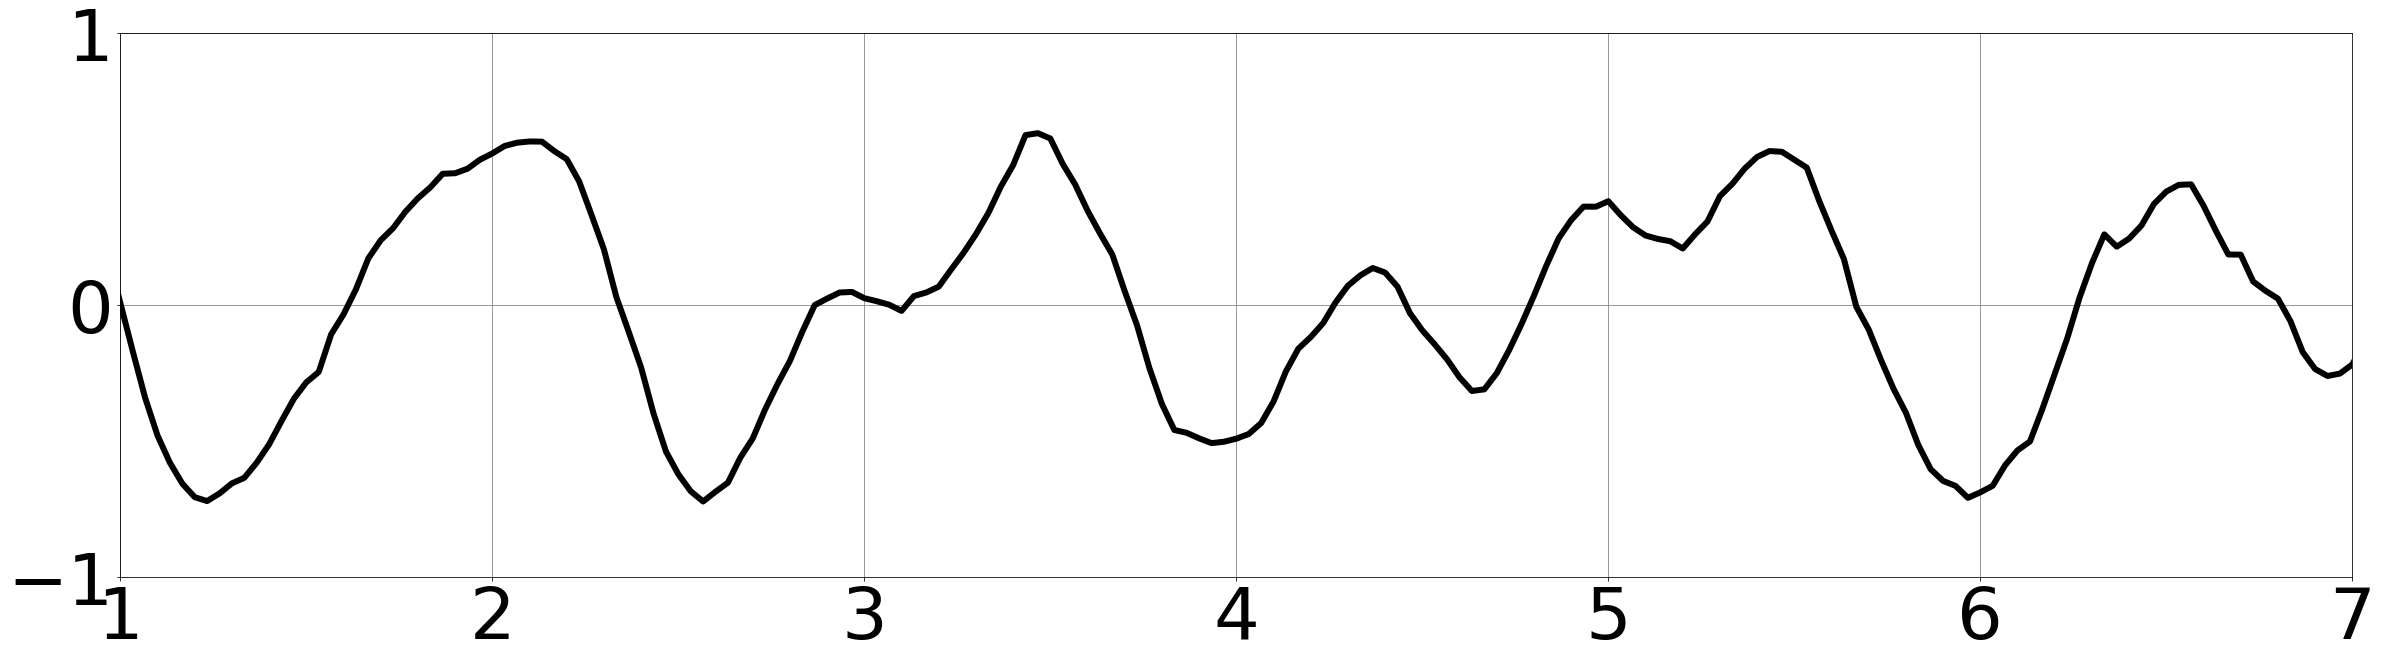

In [2]:
plt.style.use({'figure.figsize': (40, 10)})
plt.rcParams["font.size"] = 72
x = np.arange(0, 1/30*frames, 1/30)
avedata = np.convolve(g, np.ones(10)/10, mode='same')
fit = np.poly1d( np.polyfit(x, g, 12))
data = (avedata-fit(x))
plt.ylim([-1,1]); plt.xlim([1,7])
plt.grid(color='gray')
plt.plot(x, data, color='black', lw=6)

## 記事内コード用

In [ ]:
vidcap=cv2.VideoCapture('face.mov')
frames=0;r=[];g=[];b=[]; success,img=vidcap.read()
while success:
    b.append(np.average(img[1300:1350,1300:1350,0]))
    g.append(np.average(img[1300:1350,1300:1350,1]))
    r.append(np.average(img[1300:1350,1300:1350,2]))
    frames += 1; success, img = vidcap.read()
frames=len(b); x=np.arange(0,1/30*frames,1/30)
plt.plot(x, b); plt.plot(x, g); plt.plot(x, r)
avedata=np.convolve(g, np.ones(10)/10, mode='same')
fit=np.poly1d( np.polyfit(x, g, 12))
plt.plot(x, avedata-fit(x))

# pyVHR を使った、一般動画からの脈拍推定


Processing Video: /Users/jun/Downloads/miyasako_ryo.mov


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



BVP extraction with method: cpu_POS

BPM estimation with: welch

...done!



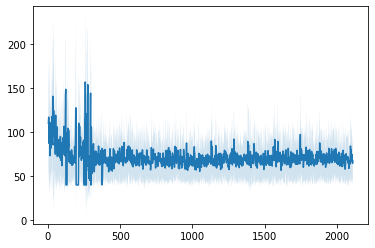

In [1]:
from pyVHR.analysis.pipeline import Pipeline
import matplotlib.pyplot as plt

pipe = Pipeline()
time, BPM, uncertainty = pipe.run_on_video(
    '/Users/jun/Downloads/miyasako_ryo.mov',
    roi_approach = "patches",
    roi_method = "faceparsing")
plt.figure()
plt.plot(time, BPM)
plt.fill_between(time, BPM-uncertainty, 
                 BPM+uncertainty, alpha=0.2)
plt.show()

In [4]:
import pickle

with open('time.bin', 'wb') as f:
    pickle.dump(time, f)
with open('BPM.bin', 'wb') as f:
    pickle.dump(BPM, f)
with open('uncertainty.bin', 'wb') as f:
    pickle.dump(uncertainty, f)

In [6]:
import pickle

with open('time.bin', 'rb') as f:
    time2 = pickle.load(f)
with open('BPM.bin', 'rb') as f:
    BPM2 = pickle.load(f)
with open('uncertainty.bin', 'rb') as f:
    uncertainty2 = pickle.load(f)

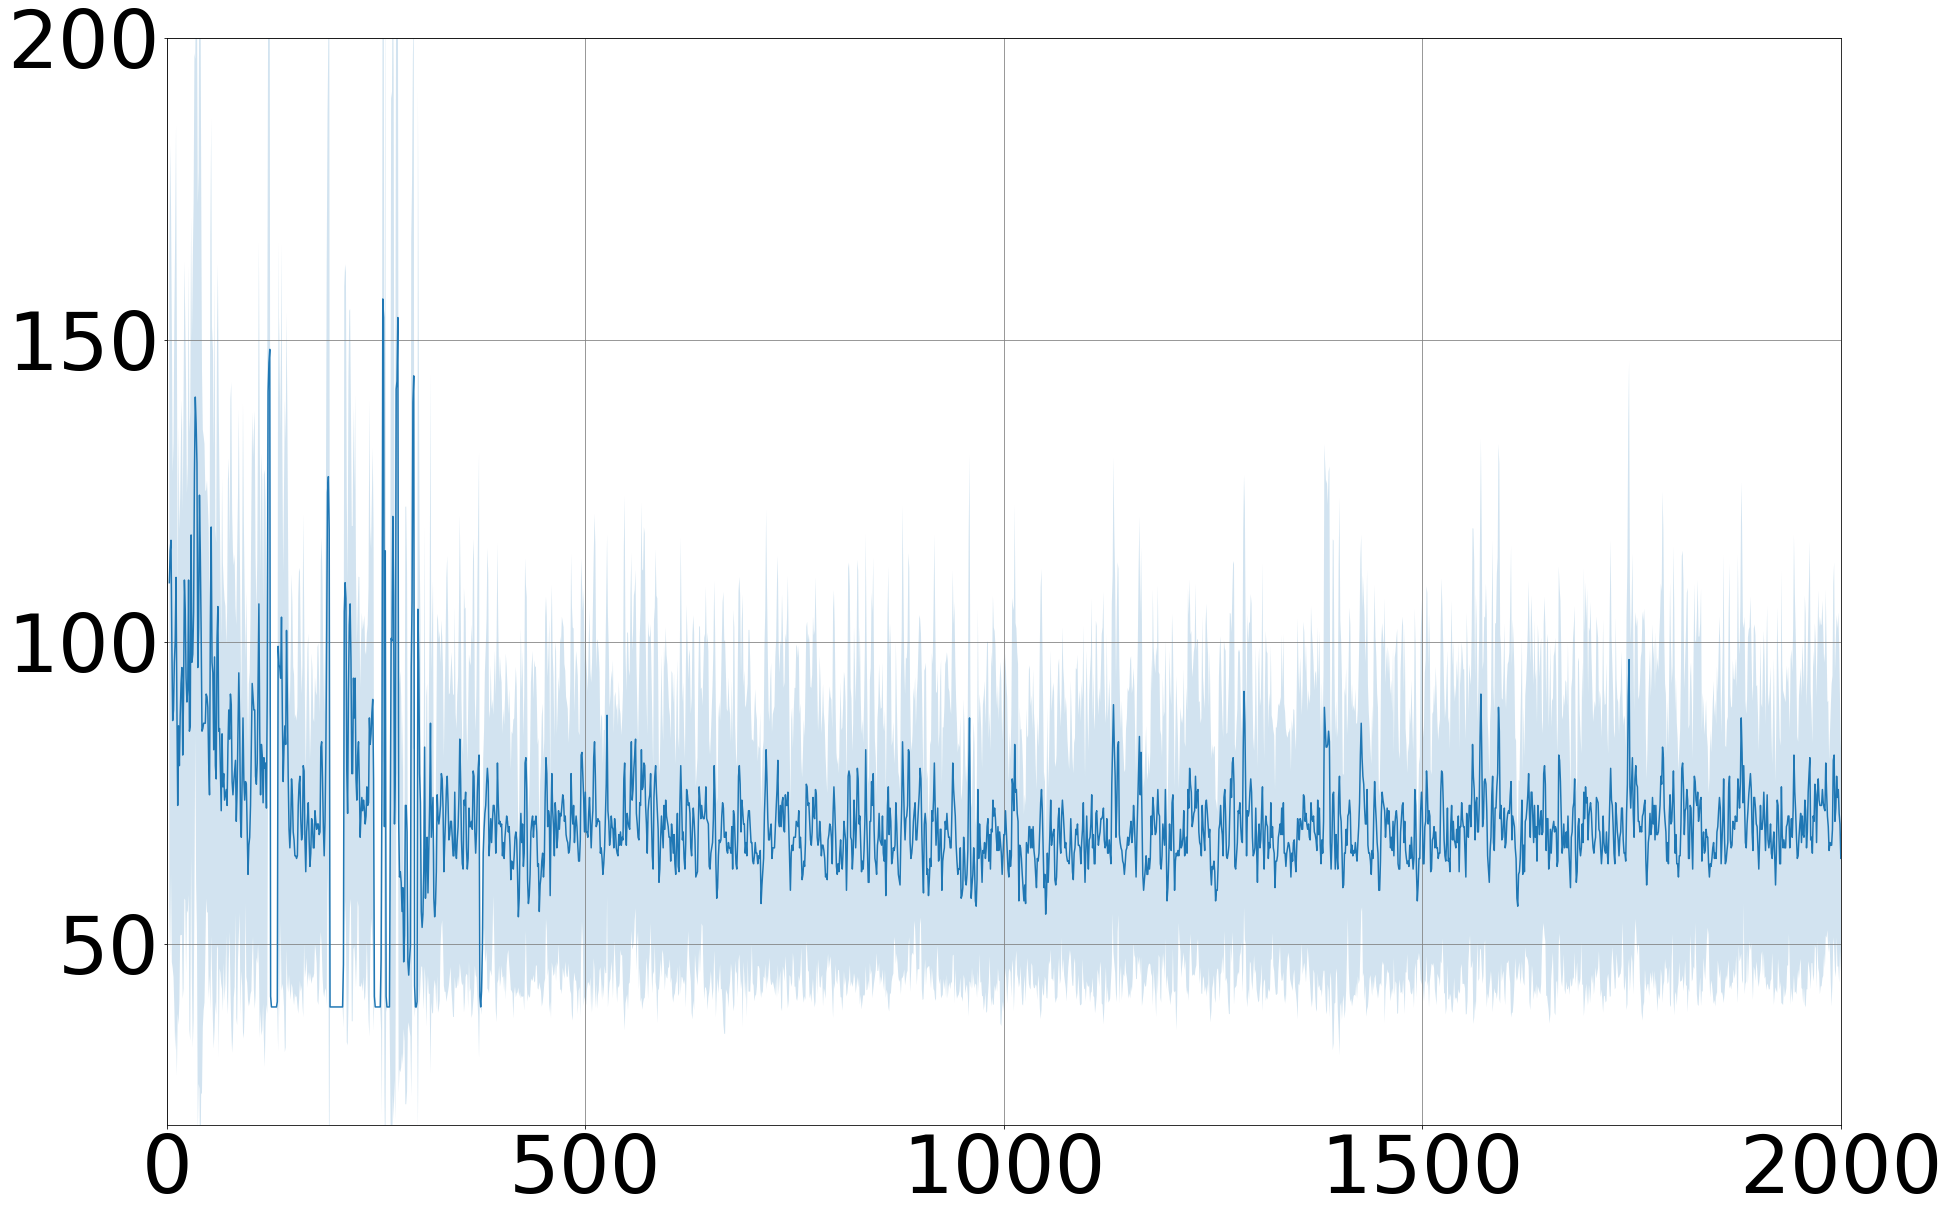

In [34]:
#plt.figure()
plt.style.use({'figure.figsize': (30, 20)})
plt.rcParams["font.size"] = 80
plt.ylim([20,200])
plt.xlim([0,2000])
plt.grid(color='gray')

plt.plot(time, BPM)
plt.fill_between(time2, BPM2-uncertainty2, BPM2+uncertainty2, alpha=0.2)
#plt.show()

In [ ]:
from pyVHR.analysis.pipeline import Pipeline
import matplotlib.pyplot as plt

pipe = Pipeline()
time,BPM,uncertainty=pipe.run_on_video('tmp.mov',
 roi_approach="patches",roi_method="faceparsing")
plt.plot(time, BPM)
